In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import pylab as plt
%matplotlib inline

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/home/akimg/Projects/ML_NeighborsClassifier-master/heart.csv')
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [3]:
X = data[data.columns[:-1]]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Without deep limit

In [4]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.737


In [5]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["trestbps", "target"],
                impurity=False, filled=True)

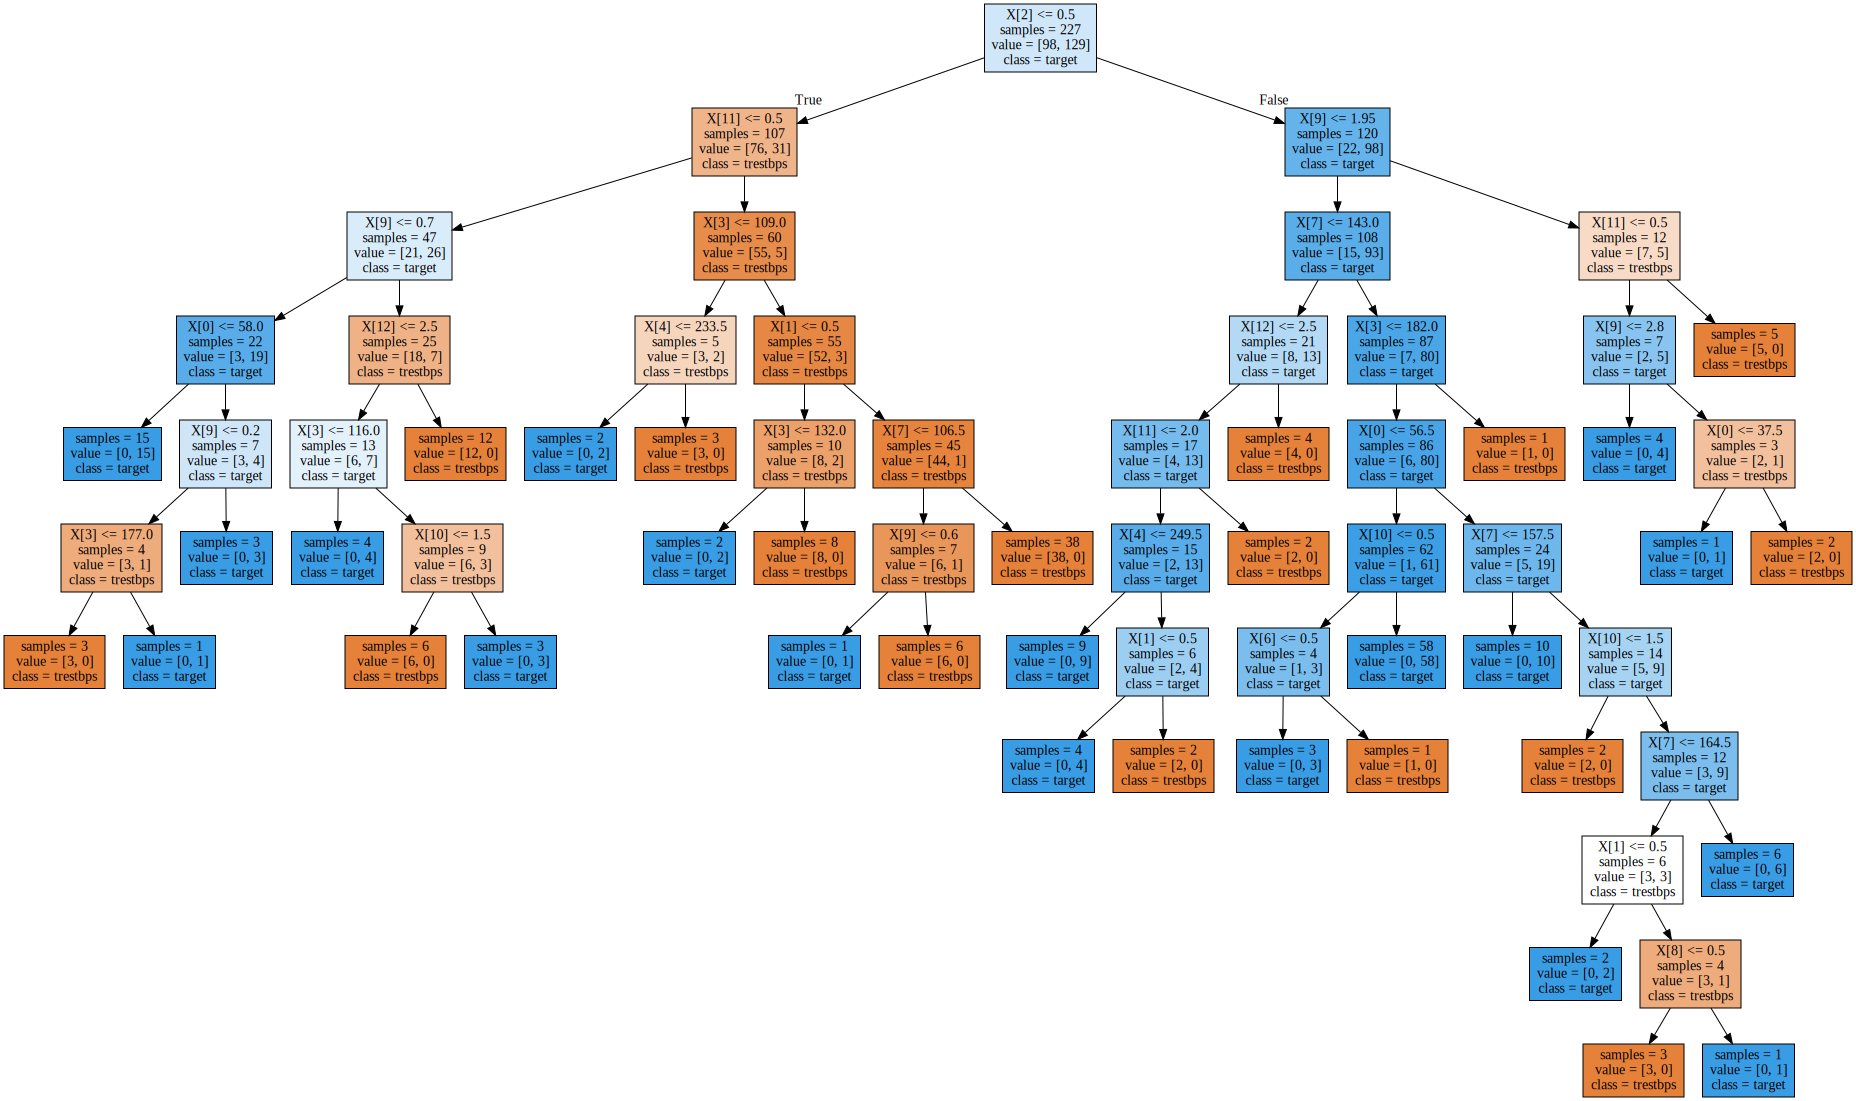

In [6]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [7]:
print("Важности признаков:\n{}".format(tree.feature_importances_))

Важности признаков:
[0.03918867 0.04205155 0.28202212 0.08947709 0.02872963 0.
 0.01346701 0.05642117 0.01346701 0.15626727 0.05742616 0.15499497
 0.06648734]


In [8]:
for name, score in zip(data.get('target'), tree.feature_importances_):
    print(name, score)

1 0.03918867328498653
1 0.04205154695187919
1 0.28202212276637095
1 0.08947709363218212
1 0.0287296313874387
1 0.0
1 0.013467014712861889
1 0.05642116503428549
1 0.013467014712861889
1 0.1562672677965673
1 0.05742616412120522
1 0.1549949681820699
1 0.0664873374172908


# With limit deep

In [9]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.899
Правильность на тестовом наборе: 0.803


In [10]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["trestbps", "target"],
                impurity=False, filled=True)

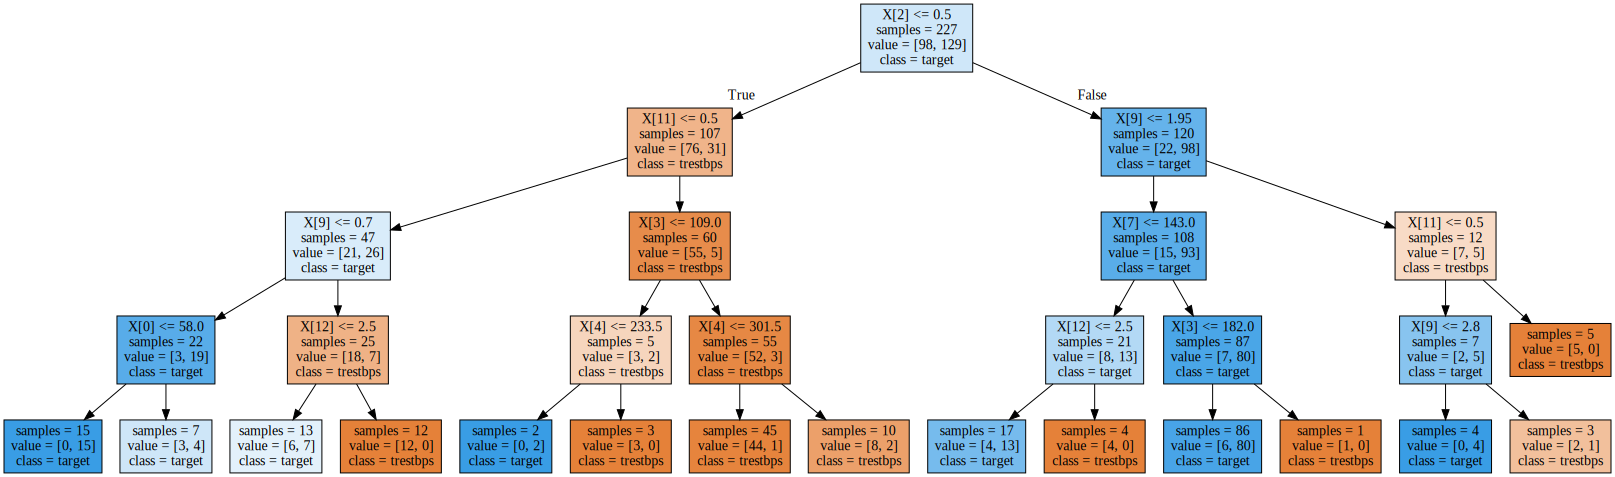

In [11]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [12]:
print("Важности признаков:\n{}".format(tree.feature_importances_))

Важности признаков:
[0.02255739 0.         0.40415592 0.03608561 0.03753253 0.
 0.         0.03930594 0.         0.17707184 0.         0.18801011
 0.09528065]


In [13]:
for name, score in zip(data.get('target'), tree.feature_importances_):
    print(name, score)

1 0.0225573920206705
1 0.0
1 0.4041559207511904
1 0.036085614330541145
1 0.037532529801635794
1 0.0
1 0.0
1 0.039305943499278975
1 0.0
1 0.17707184186243757
1 0.0
1 0.18801010808662705
1 0.09528064964761848


# Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

forest = RandomForestClassifier(n_estimators=2, random_state=0)
forest.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 0.890
Правильность на тестовом наборе: 0.724


In [22]:
print("Важности признаков:\n{}".format(tree.feature_importances_))

Важности признаков:
[0.10421442 0.01556322 0.03136225 0.11319197 0.12256356 0.
 0.00226964 0.16061433 0.0495595  0.21219748 0.08160442 0.06836454
 0.03849466]


In [23]:
for name, score in zip(data.get('target'), tree.feature_importances_):
    print(name, score)

1 0.104214418792574
1 0.01556322416984711
1 0.031362254766510084
1 0.11319197312519025
1 0.1225635618556084
1 0.0
1 0.0022696368581027132
1 0.16061433460622576
1 0.04955950045535711
1 0.21219747782292922
1 0.08160441836813617
1 0.0683645368969129
1 0.03849466228260623


# Cross-validation

In [35]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(estimator=xgb.XGBRegressor(), X=X_train, y=y_train,
                cv=5, scoring='r2')
print("Качество работы после кросс-валидации: {0}".format(cross_val))

[03:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Качество работы после кросс-валидации: [0.4474712  0.43802364 0.61128957 0.45616386 0.47187558]


# Gradient boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))
        

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.750


In [51]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.899
Правильность на тестовом наборе: 0.776
